In [1]:
####Notes:

#sex=     1-male, 0-female                                            
#fbs=     1-yes,0-no
#restecg= 1-yes,0-no
#exang=   1-yes,0-no
#target=  1-yes,0-no 

#cp------------- chest pain type
#trestbps------- resting blood pressure
#chol----------- serum cholestrol
#fbs------------ fasting blood sugar
#restecg-------- resting electrocardiograpic
#thalach-------- maximum heart rate achieved
#exang---------- exercise induced angina
#oldpeak-------- ST depression induced by exercise relative to rest
#slope---------- the slope of the peak exercise ST segment.
#ca------------- number of major vessels 0-3 colored by fluoroscopy
#thal----------- normal, fixed defect, reversible defect

In [2]:
### import libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('dataset.csv')                                                ###loading dataset

In [4]:
### dataset analyzing
for i in range(1,2,1):
    print("SHAPE:")    
    print(df.shape)
    print("COLUMNS:")  
    print(df.columns)
    print("HEAD:")     
    print(df.head())
    print("DESCRIBE:")            
    print(df.describe())
    print("INFO:")
    print(df.info())

SHAPE:
(303, 14)
COLUMNS:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
HEAD:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
DESCRIBE:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337 

In [6]:
df.isnull().sum()                                                          ###to find null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Note : the dataset does not contain null values

<AxesSubplot:>

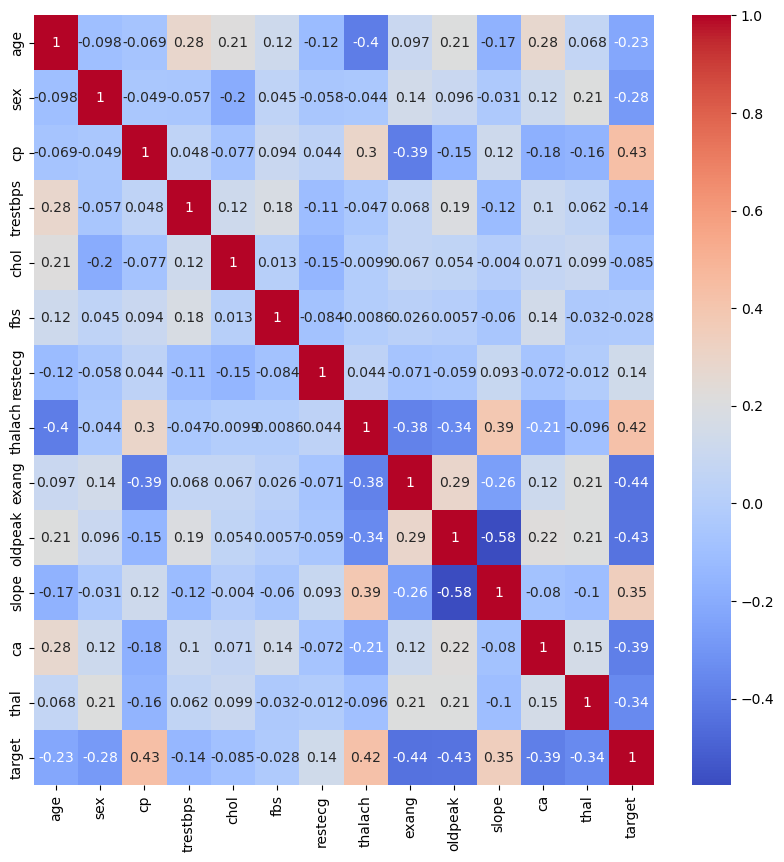

In [8]:
### data vizualization

plt.figure(figsize=(10,10))                                        
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

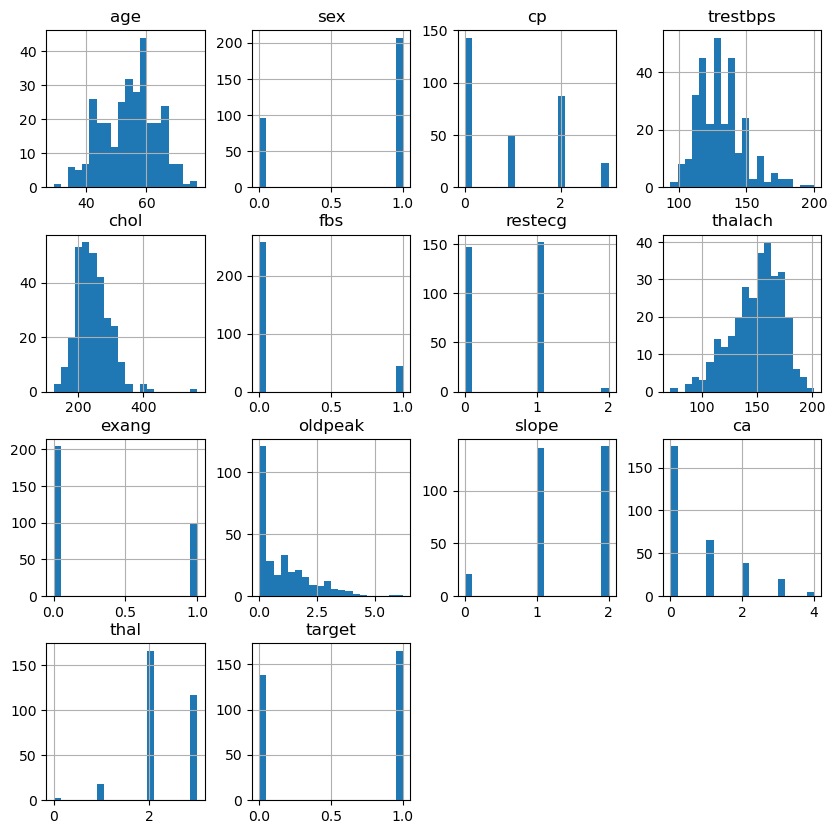

In [9]:
df.hist(bins=20, figsize=(10,10))
plt.show()

In [10]:
#countplot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
#histplot  = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<AxesSubplot:xlabel='sex', ylabel='count'>

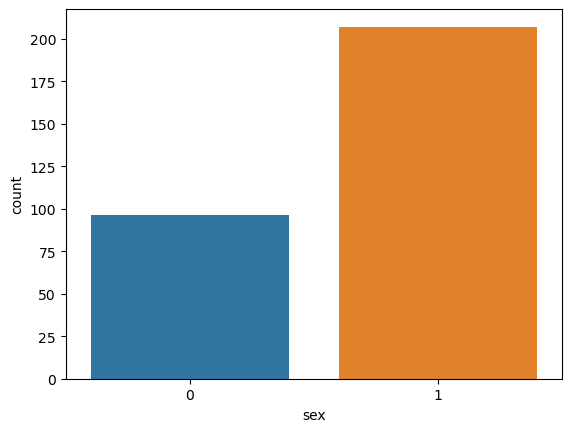

In [11]:
sns.countplot(x= 'sex', data = df)

<AxesSubplot:xlabel='cp', ylabel='count'>

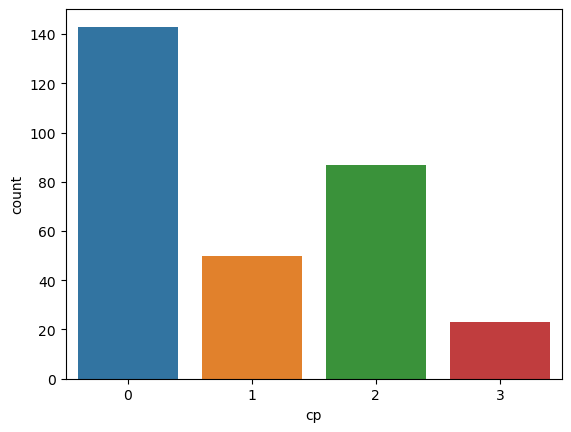

In [12]:
sns.countplot(x= 'cp', data = df)

<AxesSubplot:xlabel='fbs', ylabel='count'>

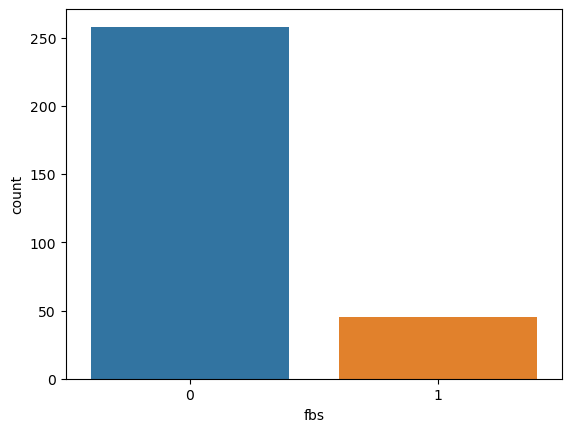

In [13]:
sns.countplot(x= 'fbs', data = df)

<AxesSubplot:xlabel='restecg', ylabel='count'>

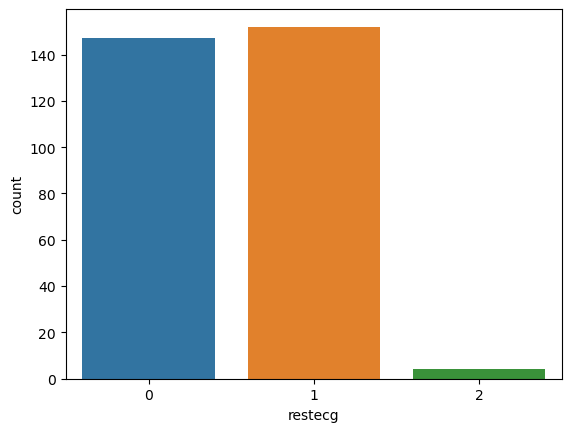

In [14]:
sns.countplot(x= 'restecg', data = df)

<AxesSubplot:xlabel='slope', ylabel='count'>

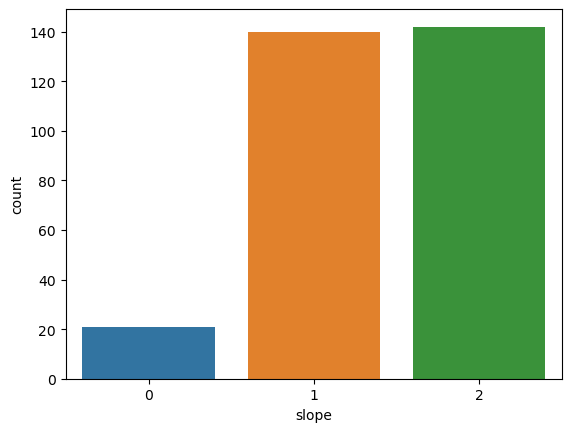

In [15]:
sns.countplot(x= 'slope', data = df)

<AxesSubplot:xlabel='ca', ylabel='count'>

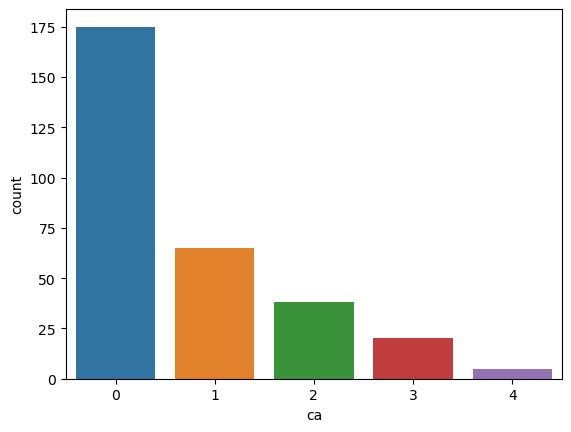

In [16]:
sns.countplot(x= 'ca', data = df)

<AxesSubplot:xlabel='thal', ylabel='count'>

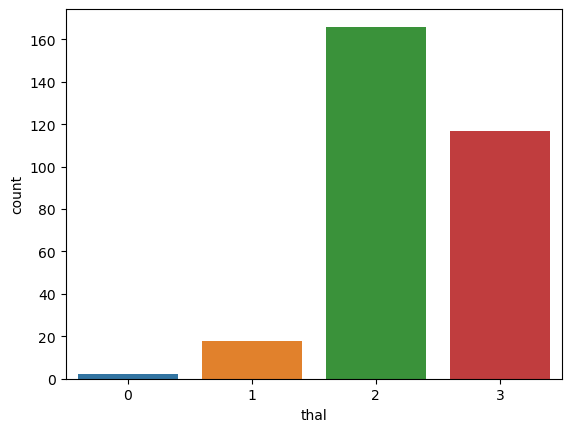

In [17]:
sns.countplot(x= 'thal', data = df)

In [18]:
#histplot 

<AxesSubplot:xlabel='age', ylabel='Count'>

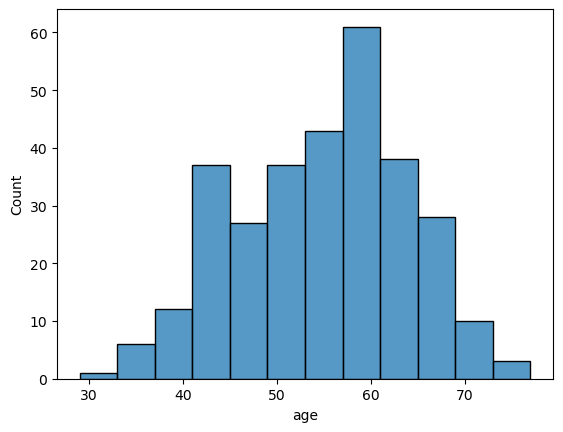

In [19]:
sns.histplot(x= 'age', data = df)

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

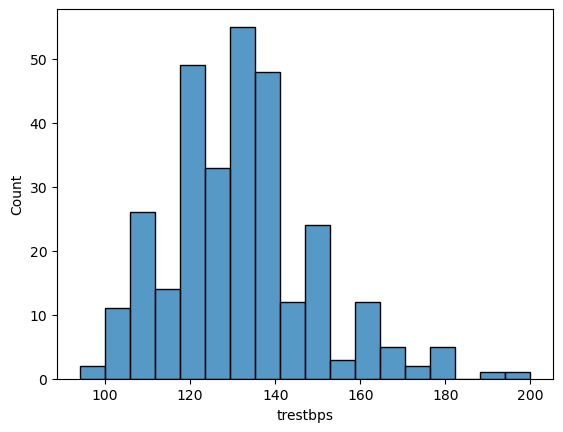

In [20]:
sns.histplot(x= 'trestbps', data = df)

<AxesSubplot:xlabel='chol', ylabel='Count'>

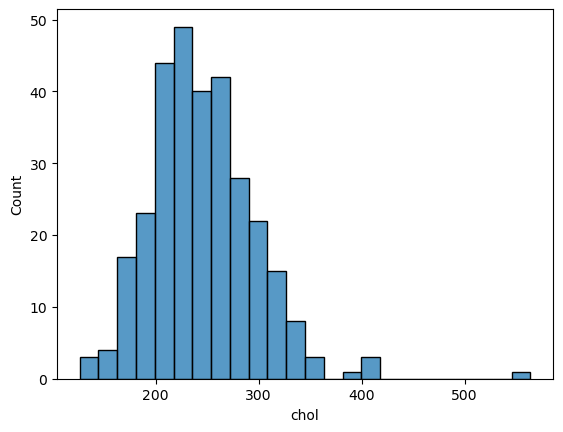

In [21]:
sns.histplot(x= 'chol', data = df)

<AxesSubplot:xlabel='thalach', ylabel='Count'>

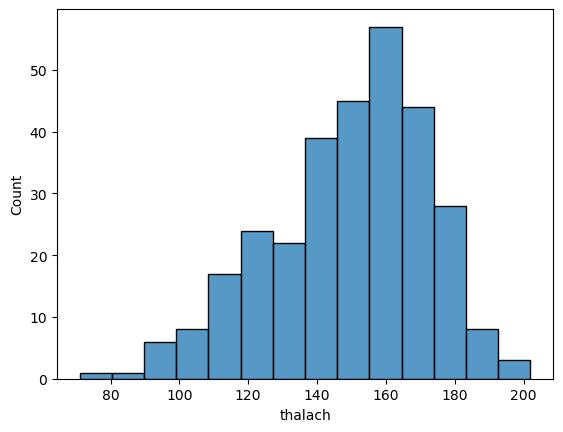

In [22]:
sns.histplot(x= 'thalach', data = df)

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

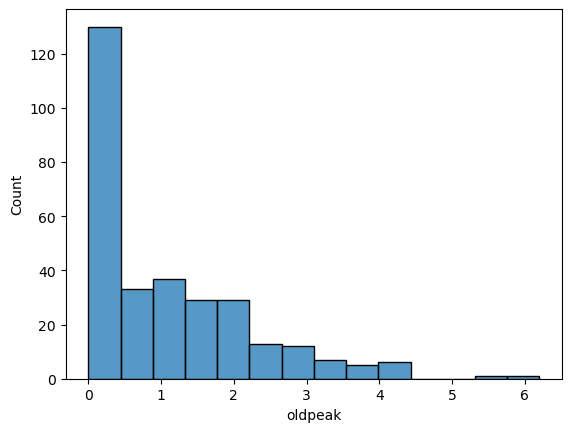

In [23]:
sns.histplot(x= 'oldpeak', data = df)

In [24]:
### data processing(feature scaling)

In [25]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']) 

In [26]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()                                                           
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [27]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [28]:
### feature(x)  &  label(y)
y = dataset['target']
x = dataset.drop(['target'], axis = 1)

In [29]:
### CLASSIFICATION ALGORITHMS
from sklearn.linear_model import LogisticRegression     
from sklearn.svm import SVC                             
from sklearn.tree import DecisionTreeClassifier         
from sklearn.naive_bayes import GaussianNB              
from sklearn.ensemble import RandomForestClassifier     
from sklearn.neighbors import KNeighborsClassifier      

In [30]:
#1 KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)                             
    score=cross_val_score(knn_classifier,x,y,cv=10)                         
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

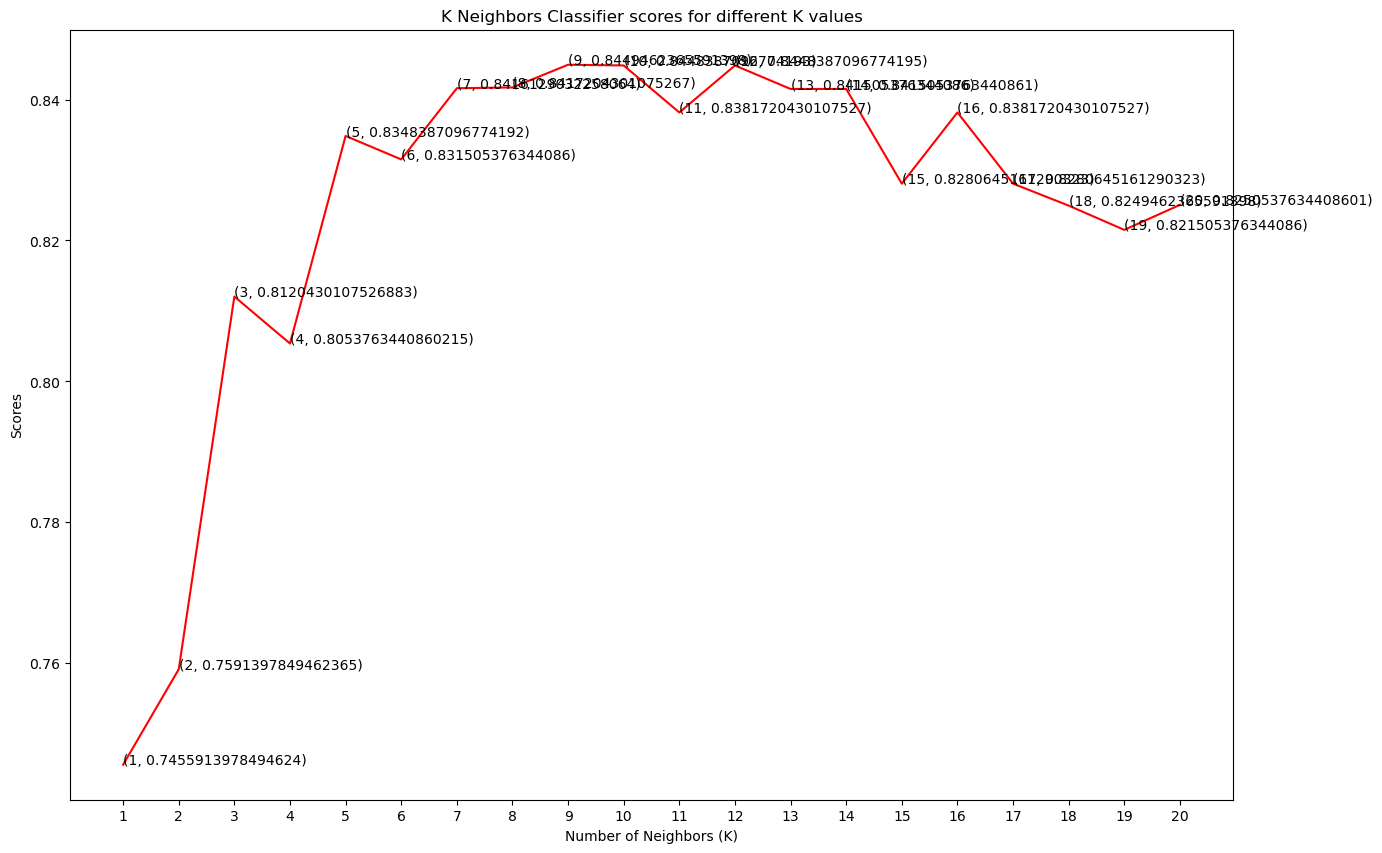

In [31]:
plt.figure(figsize=(15,10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')        
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')                                          
plt.ylabel('Scores')                                                        
plt.title('K Neighbors Classifier scores for different K values')                

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)                 
score.mean()

0.8448387096774195

In [33]:
#2.randomforest_classifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x,y,cv=10)
score.mean()

0.8180645161290323

In [34]:
#3.Logistic Regression
LRM = LogisticRegression() 
score=cross_val_score(LRM,x,y,cv=10)
score.mean()

0.8511827956989247

In [35]:
#4.Support Vector Machine
SVM = SVC()
score=cross_val_score(SVM,x,y,cv=10)
score.mean()

0.8379569892473118

In [36]:
#5.Decison Tree Classifier
DTCM = DecisionTreeClassifier(criterion="entropy", max_depth=2) 
score=cross_val_score(DTCM,x,y,cv=10)
score.mean()

0.7390322580645161

In [37]:
#6.Naive Bayes
NBM = GaussianNB() 
score=cross_val_score(NBM,x,y,cv=10)
score.mean()

0.8018279569892475

In [44]:
# 0.8448387096774195 - #1 KNeighborsClassifier
# 0.8180645161290323 - #2.randomforest_classifier
# 0.8511827956989247 - #3.Logistic Regression
# 0.8379569892473118 - #4.Support Vector Machine
# 0.7390322580645161 - #5.Decison Tree Classifier
# 0.8018279569892475 - #6.Naive Bayes

In [38]:
##Logistic Regression gives good accuracy score compared with others